#                          <h1><center>Data Exploration and Prediction of House Price</h1>

### Importing the module

In [63]:
import numpy as np#Linear algebra
import pandas as pd#Data processing,CSV file(read)
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from time import time
from sklearn.metrics import explained_variance_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree  import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [64]:
df=pd.read_csv("cleaned_melbourn_housing_data.csv") #read the csv file.

In [65]:
df.head()#head is the first 5 row in give output.

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,1,1,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067,1,0,156.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067,2,0,134.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067,2,1,94.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067,1,2,120.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019


### EDA (Exploratory Data Analysis)

##### In this step we check whether data contain null or missing values. What is the size of the data. What is the datatype of each column. What are unique values of categorical variables etc.

In [66]:
df.shape#checking the shape.

(20312, 18)

In [67]:
df.isnull().sum() #check the data in null or nan value.

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

###### To get better understanding about this dataset, I summaried all importabt variables in terms of minimum, first quartile, median, mean, third quantile and maximum value.

In [68]:
df.describe()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
count,20312.000000,2.031200e+04,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000
mean,3.067743,1.089994e+06,11.413283,3114.165961,1.596642,1.715242,597.812746,-37.806890,144.997336,7521.028358
std,0.944962,6.556246e+05,6.785729,114.554795,0.703154,0.992487,535.083347,0.091806,0.120199,4404.138049
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,14.000000,-38.190430,144.423790,121.000000
25%,2.000000,6.570000e+05,6.600000,3046.000000,1.000000,1.000000,308.000000,-37.861300,144.925048,4385.000000
50%,3.000000,9.100000e+05,10.500000,3087.000000,1.000000,2.000000,567.000000,-37.799700,145.004500,6567.000000
75%,4.000000,1.333250e+06,14.200000,3152.000000,2.000000,2.000000,696.000000,-37.748000,145.069500,10331.000000
max,16.000000,1.120000e+07,48.100000,3977.000000,9.000000,18.000000,9838.000000,-37.397800,145.526350,21650.000000


In [69]:
df["Price"].describe()#Summary of Target Variable:Price

count    2.031200e+04
mean     1.089994e+06
std      6.556246e+05
min      8.500000e+04
25%      6.570000e+05
50%      9.100000e+05
75%      1.333250e+06
max      1.120000e+07
Name: Price, dtype: float64

In [70]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')

In [71]:
df["Regionname"].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

##### In this step we check by finding correlation of all the features wrt target variable i.e., price to see whether they are positively correlated or negatively correlated to find if they help in prediction process in model building process or not. But this is also one of the most important step as it also involves domain knowledge of the field of the data means you cannot simply remove the feature from your prediction process just because it is negatively correlated because it may contribute in future prediction for this you should take help of some domain knowledge personnel.

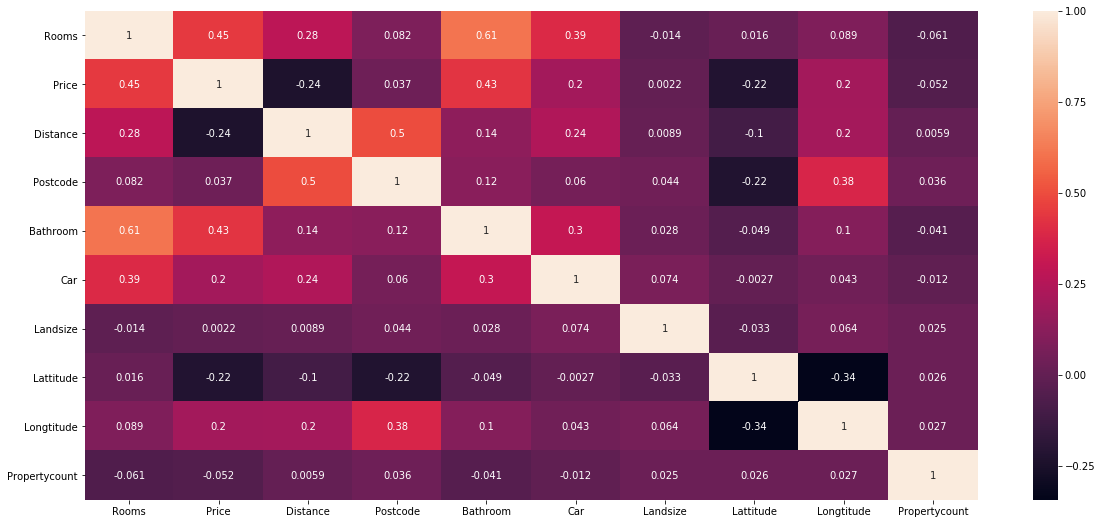

In [72]:
corr = df.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

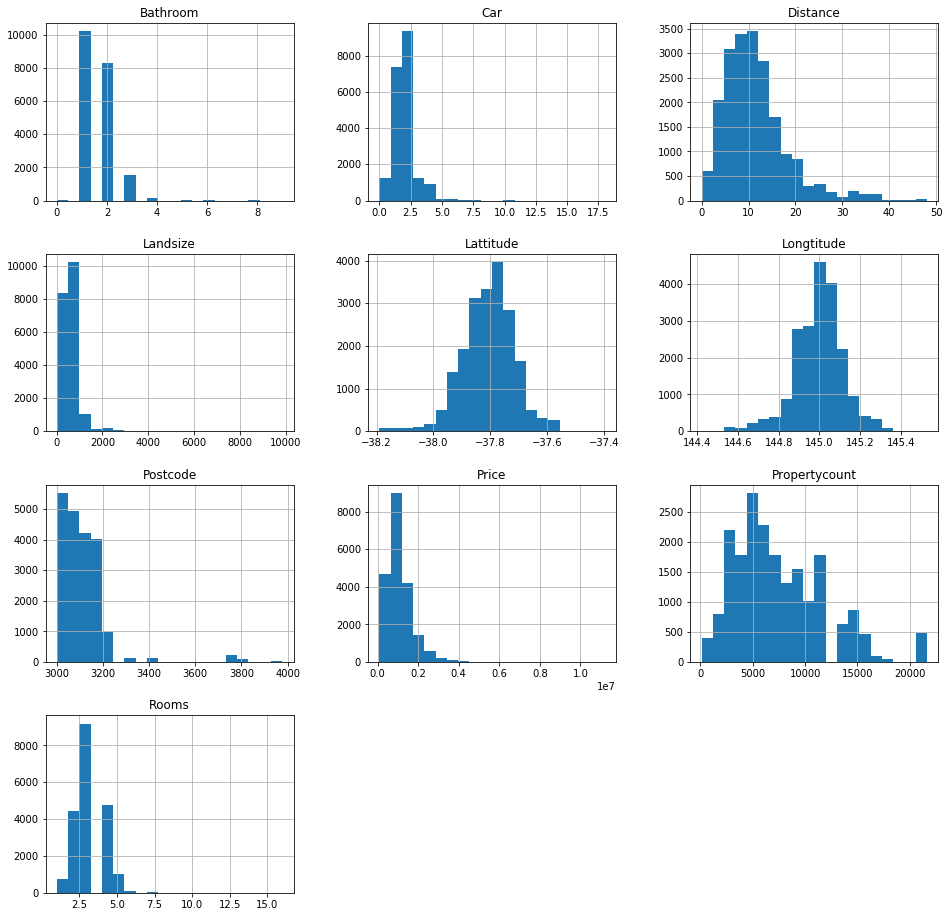

In [75]:
df.hist(bins=20,figsize=(16,16))
plt.show()

In [40]:
df.drop(["Address","Method","SellerG","Postcode","Date"],axis=1,inplace=True)
#drop the coloumn in dataframe and inplace is use to final data frame drop the columns.

### Descriptive and exploratory analysis of Price

##### Price is our target variable and also the dependent variable for prediction. According to the assumptions of Linear Regression, data should be normally distributed. By checking the distribution of Price, we can decide if we need non-linear transformation, like log term, to make better prediction.

Text(0.5, 0, 'Log SalePrice')

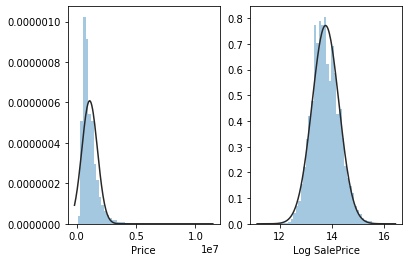

In [41]:
plt.subplot(1, 2, 1)
sns.distplot(df.Price, kde=False, fit = norm)
plt.subplot(1, 2, 2)
sns.distplot(np.log(df.Price), kde=False, fit = norm)
plt.xlabel('Log SalePrice')

##### From the histogram above, the distribution of our target variable-- Price is skewed to right. Thus, a log term of Price should be generated for linear regression. Here, we name it LogSalePrice.Great! After fixing, LogSalePrice is normally distributed.

## Preprocessing

##### Catagrial coloumn convert to number using the LabelEncoder

In [14]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
df=MultiColumnLabelEncoder(columns = ['Regionname','Suburb','Type','CouncilArea']).fit_transform(df)

In [15]:
df.head()

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,2,0,1480000,2.5,1,1,202.0,31,-37.7996,144.9984,2,4019
1,0,2,0,1035000,2.5,1,0,156.0,31,-37.8079,144.9934,2,4019
2,0,3,0,1465000,2.5,2,0,134.0,31,-37.8093,144.9944,2,4019
3,0,3,0,850000,2.5,2,1,94.0,31,-37.7969,144.9969,2,4019
4,0,4,0,1600000,2.5,1,2,120.0,31,-37.8072,144.9941,2,4019


## Seperate the data features and target 

In [16]:
features=df.drop(["Price"],axis=1)
features.head()

,Suburb,Rooms,Type,Distance,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,2,0,2.5,1,1,202.0,31,-37.7996,144.9984,2,4019
1,0,2,0,2.5,1,0,156.0,31,-37.8079,144.9934,2,4019
2,0,3,0,2.5,2,0,134.0,31,-37.8093,144.9944,2,4019
3,0,3,0,2.5,2,1,94.0,31,-37.7969,144.9969,2,4019
4,0,4,0,2.5,1,2,120.0,31,-37.8072,144.9941,2,4019


In [17]:
target=df["Price"]
target.head()

0    1480000
1    1035000
2    1465000
3     850000
4    1600000
Name: Price, dtype: int64

## Splitting Data Into Tranning And Testing Set

In [42]:
train_x,test_x,train_y,test_y=train_test_split(features,target,test_size=.20,random_state=1000)
model = sm.OLS(target, features).fit()
predictions = model.predict(features) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.863
Model:                            OLS   Adj. R-squared (uncentered):              0.863
Method:                 Least Squares   F-statistic:                          1.065e+04
Date:                Thu, 03 Oct 2019   Prob (F-statistic):                        0.00
Time:                        15:53:55   Log-Likelihood:                     -2.9415e+05
No. Observations:               20312   AIC:                                  5.883e+05
Df Residuals:                   20300   BIC:                                  5.884e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Suburb         -608.9606     35.825    -16.998      0.000    -679.182    -538.740
Rooms           1.71e+05   5290.387     32.321      0.000    1.61e+05    1.81e+05
Type          -2.399e+05   5380.213    -44.586      0.000    -2.5e+05   -2.29e+05
Distance      -4.314e+04    527.726    -81.740      0.000   -4.42e+04   -4.21e+04
Bathroom       2.346e+05   6033.413     38.886      0.000    2.23e+05    2.46e+05
Car            3.219e+04   3731.653      8.625      0.000    2.49e+04    3.95e+04
Landsize         58.8098      6.370      9.232      0.000      46.324      71.295
CouncilArea   -5607.9115    344.283    -16.289      0.000   -6282.733   -4933.090
Lattitude     -1.765e+06   4.47e+04    -39.454      0.000   -1.85e+06   -1.68e+06
Longtitude    -4.537e+05   1.16e+04    -38.980      0.000   -4.76e+05   -4.31e+05
Regionname    -2.076e+04   1877.291    -11.058      0.000   -2.44e+04   -1.71e+04
Propertycount     1.0131      0.765      1.324      0.185      -0.486       2.513
==============================================================================
Omnibus:                    13569.958   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           484962.783
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      26.312   Cond. No.                     1.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Fitting

##### Linear Regression model

In [50]:
cr=LinearRegression()
cr.fit(train_x,train_y)
y_pred=cr.predict(test_x)
LR=cr.score(test_x,test_y)
varL = explained_variance_score(y_pred,test_y)

##### RandomForest

In [51]:
model = RandomForestRegressor(random_state=10)
model.fit(train_x,train_y)
RS=model.score(test_x,test_y)
pred = model.predict(test_x)
varR = explained_variance_score(pred,test_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


##### GradientBoostingRegressor

In [46]:
start = time()
est=GradientBoostingRegressor(n_estimators=400, max_depth=5, loss='ls',min_samples_split=2,learning_rate=0.1).fit(train_x, train_y)
end=time()
tra_time_g=end-start
gradient=est.score(test_x,test_y)

pred = est.predict(test_x)
varG = explained_variance_score(pred,test_y)
gradient

0.8376737077177809

##### DecisionTree

In [48]:
decision=DecisionTreeRegressor()
start = time()
decision.fit(train_x, train_y)
end=time()
train_time_dec=end-start
decc=decision.score(test_x,test_y)
decpredict = decision.predict(test_x)
varD = explained_variance_score(decpredict,test_y)


In [54]:
AllScore=[["Linear",LR,varL],["RandomForest",RS,varR],["GradientBoosting",gradient,varG],["DecisionTree",decc,varD]]

In [56]:
df_1 = pd.DataFrame(AllScore, columns = ['Model', 'Accuracy','Explained_variance_score']) 
  

In [57]:
df_1

,Model,Accuracy,Explained_variance_score
0,Linear,0.560943,0.232560
1,RandomForest,0.804811,0.771802
2,GradientBoosting,0.837674,0.818320
3,DecisionTree,0.616703,0.632441


## Conclusion

##### So, we have seen that accuracy of gradient boosting is around 83.76% and also achieved decent variance score of 0.81 which is close to 1 . Therefore, it is inferred that Gradient Boosting is the suitable model for this dataset.